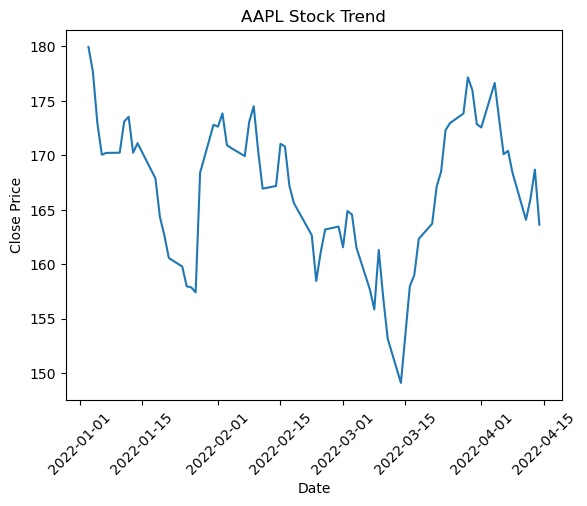

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on the ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2022-01-01', end='2022-04-18')

# Plot the close prices
plt.plot(tickerDf['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"{tickerSymbol} Stock Trend")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

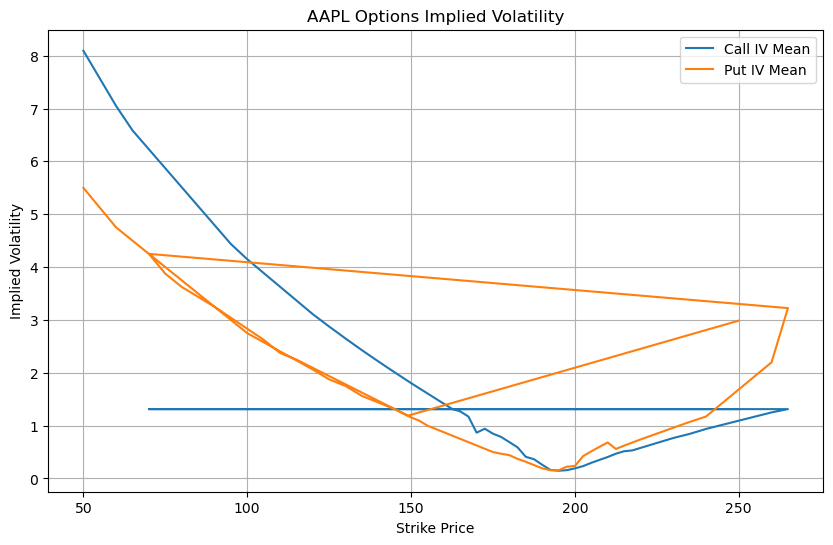

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on the ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the options chain for this ticker
options = tickerData.option_chain()

# Get the call options and put options
calls = options.calls
puts = options.puts

# Calculate the implied volatility for each option
calls['Implied Volatility'] = calls['impliedVolatility']
puts['Implied Volatility'] = puts['impliedVolatility']

# Group the call options by strike price and calculate the mean implied volatility
calls_grouped = calls.groupby('strike')['Implied Volatility'].mean().reset_index()
calls_grouped = calls_grouped.rename(columns={'strike': 'Strike Price', 'Implied Volatility': 'Call IV Mean'})

# Group the put options by strike price and calculate the mean implied volatility
puts_grouped = puts.groupby('strike')['Implied Volatility'].mean().reset_index()
puts_grouped = puts_grouped.rename(columns={'strike': 'Strike Price', 'Implied Volatility': 'Put IV Mean'})

# Merge the call and put dataframes on strike price
merged_df = pd.merge(calls_grouped, puts_grouped, on='Strike Price', how='outer')

# Interpolate missing values using linear interpolation
merged_df = merged_df.interpolate(method='linear')

# Plot the mean implied volatility for each strike price
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Strike Price'], merged_df['Call IV Mean'], label='Call IV Mean')
plt.plot(merged_df['Strike Price'], merged_df['Put IV Mean'], label='Put IV Mean')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title(f"{tickerSymbol} Options Implied Volatility")
plt.legend()
plt.grid(True)
plt.show()